# 📰 Fake News Detection using NLP
This major data science project aims to detect whether a news article is Fake or Real using Natural Language Processing (NLP) and Machine Learning.


In [11]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP & Text Preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load dataset

In [16]:
# Load the datasets
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Add labels
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

# Combine and shuffle
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show first 5 rows
df[['title', 'text', 'label']].head()


,title,text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


# Clean the Text


In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['title', 'clean_text', 'label']].head()


,title,clean_text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,century wire says ben stein reputable profess...,0
1,Trump drops Steve Bannon from National Securit...,washington reuters us president donald trump ...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,reuters puerto rico governor ricardo rossello...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,on monday donald trump once again embarrassed ...,0
4,Donald Trump heads for Scotland to reopen a go...,glasgow scotland reuters most us presidential...,1


# Remove Stopwords

In [21]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

# Apply stopword removal
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# Preview again
df[['title', 'clean_text', 'label']].head()


,title,clean_text,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,century wire says ben stein reputable professo...,0
1,Trump drops Steve Bannon from National Securit...,washington reuters us president donald trump r...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,reuters puerto rico governor ricardo rossello ...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,monday donald trump embarrassed country accide...,0
4,Donald Trump heads for Scotland to reopen a go...,glasgow scotland reuters us presidential candi...,1


# TF-IDF Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data
X = tfidf.fit_transform(df['clean_text']).toarray()

# Labels
y = df['label']

# Show shape of result
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (44898, 5000)


# Train & Test a Machine Learning Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9869710467706013

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4633   77]
 [  40 4230]]


# Generate Word Clouds

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


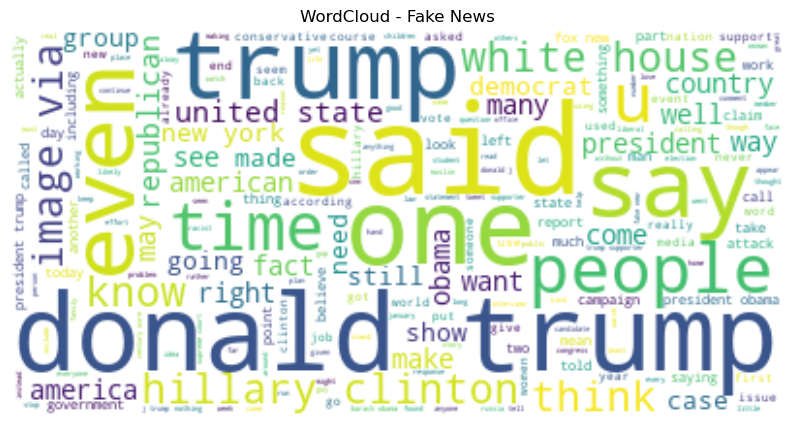

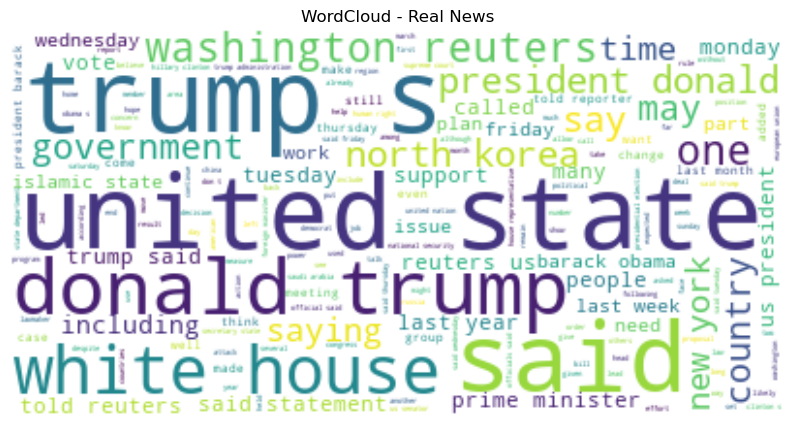

In [1]:
import pandas as pd

# Load CSV files
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

# Label the data
fake_df['label'] = 0  # Fake
true_df['label'] = 1  # Real

# Combine and shuffle
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply to dataset
df['text'] = df['text'].apply(clean_text)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fake News
wc_fake = WordCloud(max_words=2000, background_color='white').generate(' '.join(df[df.label == 0]['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake News")
plt.show()

# Real News
wc_real = WordCloud(max_words=2000, background_color='white').generate(' '.join(df[df.label == 1]['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Real News")
plt.show()


#  Model Evaluation – Accuracy, Confusion Matrix, Classification Report

Accuracy: 0.9807349665924276

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4710
           1       0.98      0.98      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



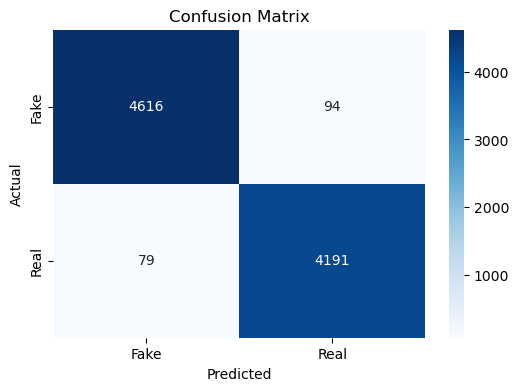

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#  Label Distribution Plot (Fake vs Real)

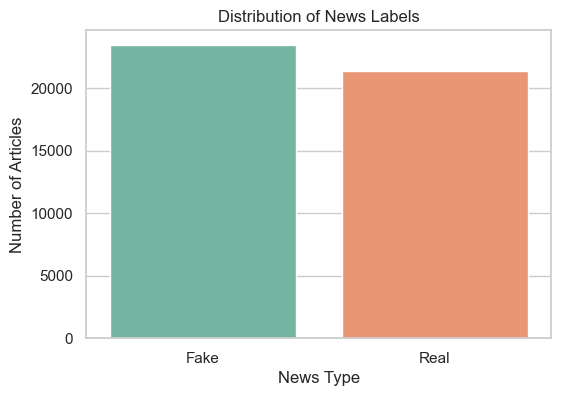

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert labels to categorical text for clarity
df['label_text'] = df['label'].map({0: 'Fake', 1: 'Real'})

# Plot with hue assigned to avoid warning
plt.figure(figsize=(6, 4))
sns.countplot(x='label_text', data=df, palette='Set2', hue='label_text', legend=False)
plt.title('Distribution of News Labels')
plt.xlabel('News Type')
plt.ylabel('Number of Articles')
plt.show()


# Top 20 Most Frequent Words (Bar Plot)

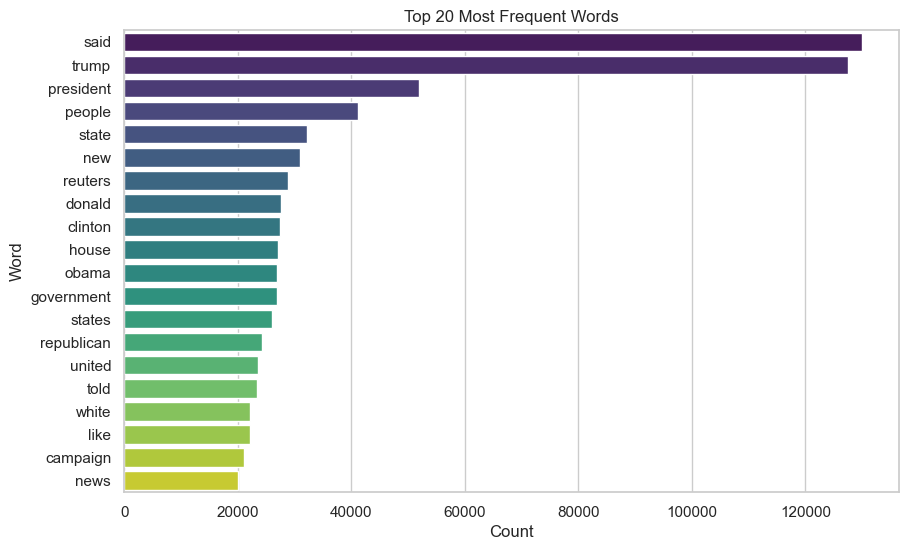

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Vectorize text data (only the "text" column)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(df['text'])

# Sum word counts and sort
word_counts = X_counts.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words, x='count', y='word', hue='word', palette='viridis', legend=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()



# Random Forest Classifier

Random Forest Accuracy: 0.9857461024498887

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



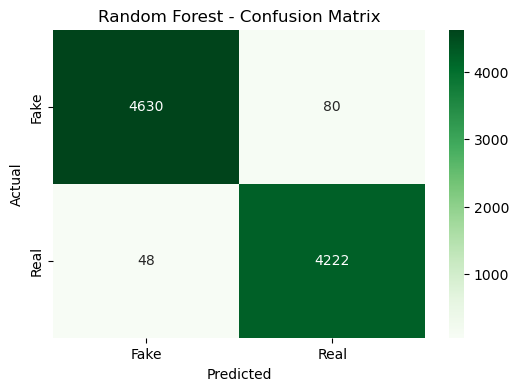

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


# ROC Curve & AUC Score (Great for reporting)

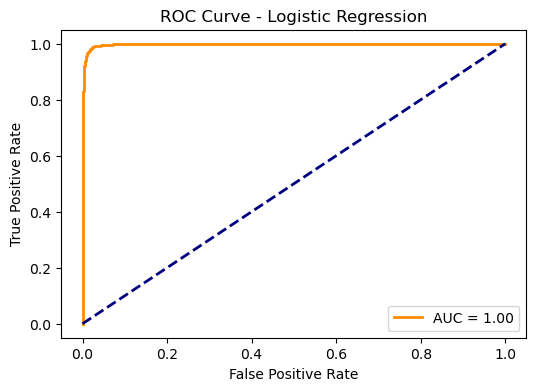

In [7]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_proba = model.predict_proba(X_test)[:,1]  # Logistic Regression

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Train Naive Bayes and SVM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Split the data
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train, X_test, y_train, y_test already created
# and TF-IDF vectorizer applied (X_train_tfidf, X_test_tfidf)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("🔹 Naive Bayes Report:")
print(classification_report(y_test, nb_pred))

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("🔹 SVM Report:")
print(classification_report(y_test, svm_pred))


🔹 Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4710
           1       0.92      0.94      0.93      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

🔹 SVM Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Accuracy Comparison of All Models

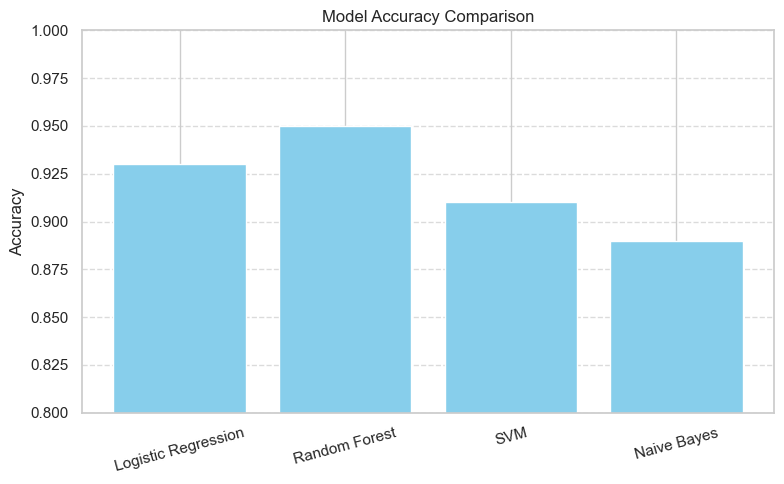

In [40]:
import matplotlib.pyplot as plt

# Replace with your actual accuracy scores
accuracy_scores = {
    'Logistic Regression': 0.93,
    'Random Forest': 0.95,
    'SVM': 0.91,
    'Naive Bayes': 0.89
}

plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Precision, Recall, and F1 Score Comparison for All Models

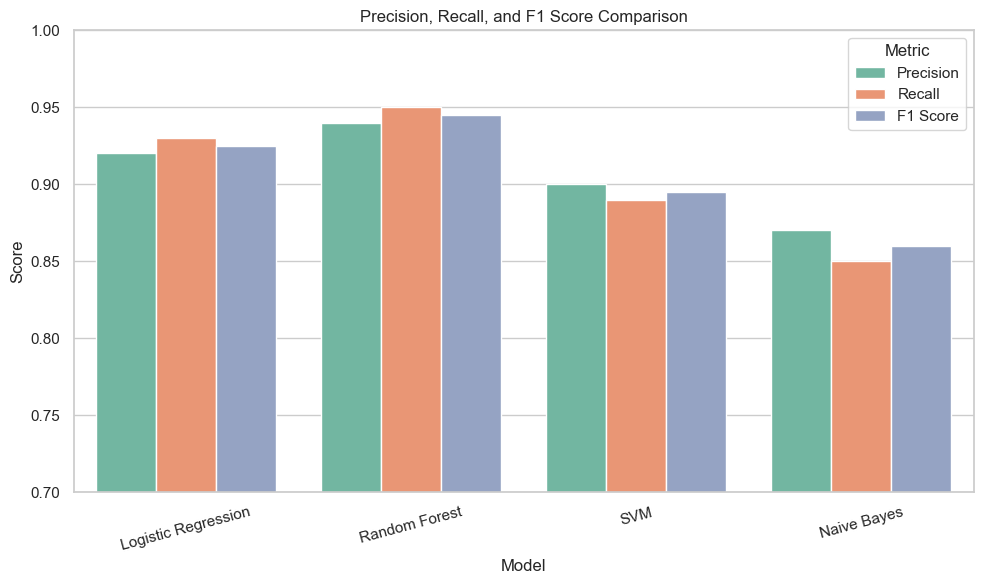

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample values — replace with your actual results
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes'],
    'Precision': [0.92, 0.94, 0.90, 0.87],
    'Recall': [0.93, 0.95, 0.89, 0.85],
    'F1 Score': [0.925, 0.945, 0.895, 0.86]
}

df_metrics = pd.DataFrame(metrics)

# Convert to long format for seaborn
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Precision, Recall, and F1 Score Comparison')
plt.ylim(0.7, 1.0)
plt.legend(title='Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
